In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

In [9]:
seed_value = 42 

random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)


In [10]:
# Define the data path and Load dataset
data_path = '../Datasets/pathmnist.npz'
pneumoniamnist = np.load(data_path)

# Seperate the dataset
train_images = pneumoniamnist['train_images']
train_labels = pneumoniamnist['train_labels']

val_images = pneumoniamnist['val_images']
val_labels = pneumoniamnist['val_labels']

test_images = pneumoniamnist['test_images']
test_labels = pneumoniamnist['test_labels']



In [11]:
from tensorflow.keras.utils import to_categorical

# Pre-process
# Normalisation
train_images = train_images.astype('float32') / 255
val_images = val_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convet labels to the categorical
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# # Define the number of classes need to classification
num_classes = 9

# Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 3)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Trainning
history = model.fit(train_images, train_labels,
                    batch_size=64,
                    epochs=16,
                    validation_data=(val_images, val_labels))

Epoch 1/16
1407/1407 [==============================] - 90s 63ms/step - loss: 1.1756 - accuracy: 0.5570 - val_loss: 0.7097 - val_accuracy: 0.7290
Epoch 2/16
1407/1407 [==============================] - 84s 60ms/step - loss: 0.7639 - accuracy: 0.7226 - val_loss: 0.5756 - val_accuracy: 0.7892
Epoch 3/16
1407/1407 [==============================] - 76s 54ms/step - loss: 0.6262 - accuracy: 0.7753 - val_loss: 0.4777 - val_accuracy: 0.8254
Epoch 4/16
1407/1407 [==============================] - 78s 56ms/step - loss: 0.5091 - accuracy: 0.8202 - val_loss: 0.3833 - val_accuracy: 0.8622
Epoch 5/16
1407/1407 [==============================] - 80s 57ms/step - loss: 0.4447 - accuracy: 0.8439 - val_loss: 0.3722 - val_accuracy: 0.8625
Epoch 6/16
1407/1407 [==============================] - 94s 66ms/step - loss: 0.3926 - accuracy: 0.8608 - val_loss: 0.2844 - val_accuracy: 0.8977
Epoch 7/16
1407/1407 [==============================] - 87s 62ms/step - loss: 0.3624 - accuracy: 0.8727 - val_loss: 0.3208 -

In [15]:
# Evaluate the test result
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100}%")

225/225 [==============================] - 2s 8ms/step - loss: 0.3793 - accuracy: 0.8979
Test Accuracy: 89.79108929634094%


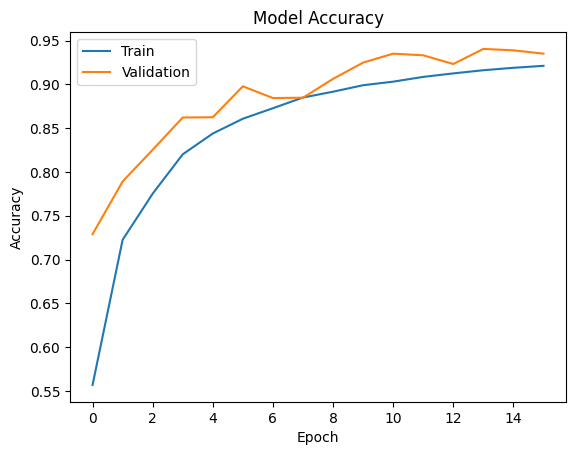

In [19]:
# Plot the learning process (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.savefig("Model Accuracy in each epoch.png")
plt.show()

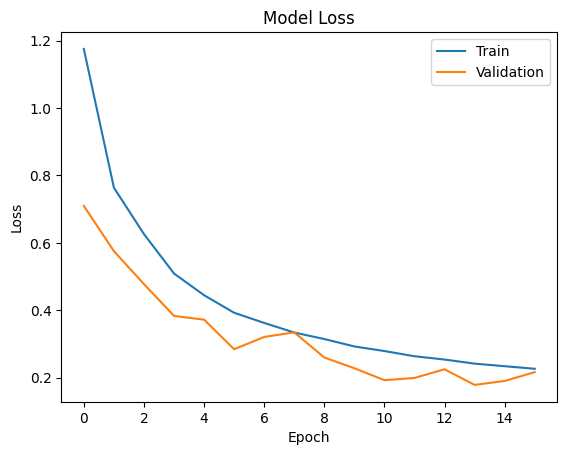

In [24]:
# Plot the learning process (Loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.savefig("Model loss in each epoch.png")
plt.show()

225/225 [==============================] - 2s 9ms/step


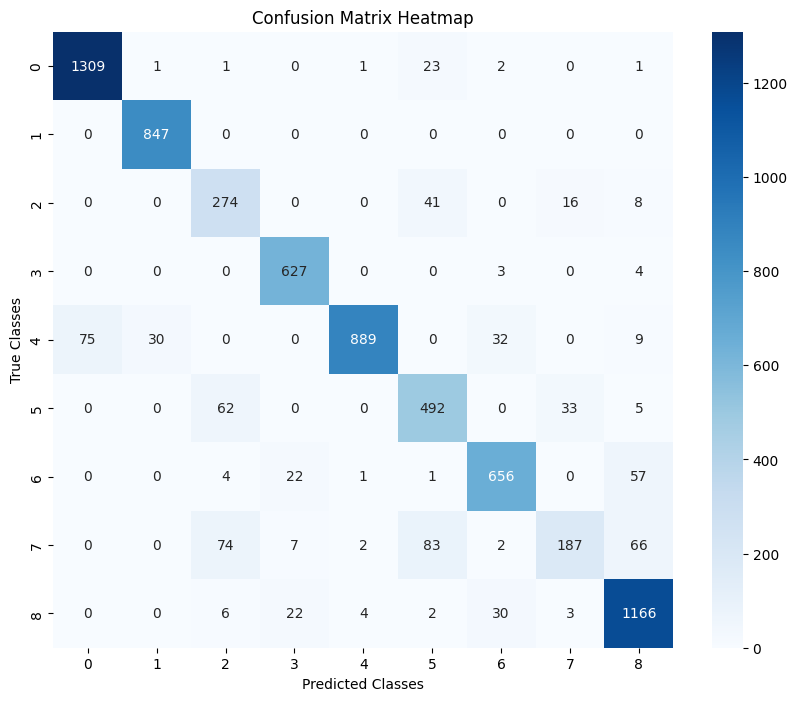

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict for test dataset
predictions = model.predict(test_images)

predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

# calculate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.title('Confusion Matrix Heatmap')
plt.ylabel('True Classes')
plt.xlabel('Predicted Classes')
plt.savefig("Confusion Matrix Heatmap.png")
plt.show()

In [23]:
model.save('CNN_task2.h5')